# Lab \#2: Probability, Distributions, and Statistical Questions

## Problem 1  

In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).
  
**A) Show how the probability distribution of the background changes as you integrate (sum) for more days.**

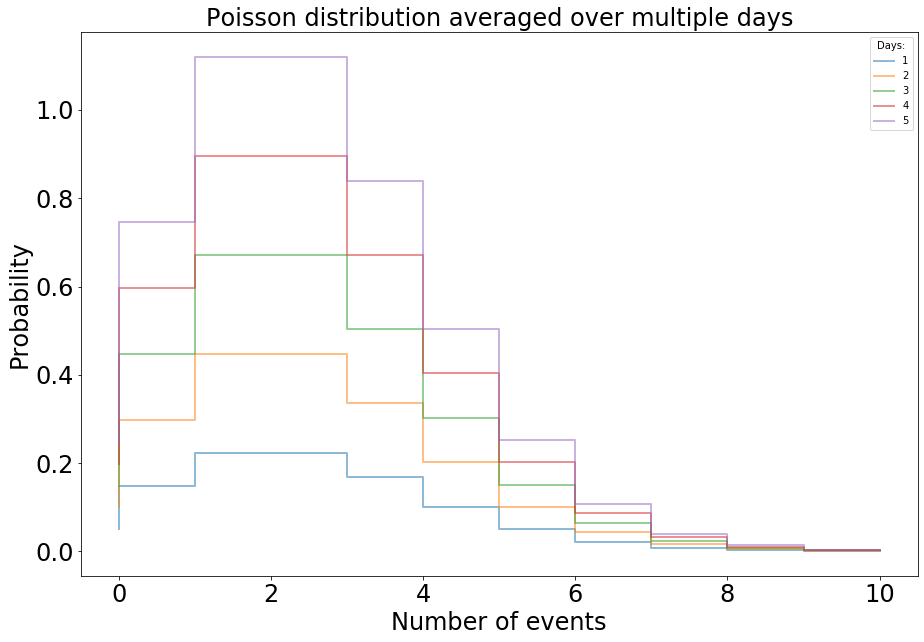

In [45]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy.optimize import curve_fit
from scipy import stats
from matplotlib.patches import Polygon

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)  
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 18)

# pick 3 as X, 5 as Y

average = 3
maxDays = 5
x = np.linspace(0,10,11)
base = stats.poisson.pmf(x, average, loc=0)

for days in range(1,maxDays+1):
    distribution = base*days
    ax.step(x, distribution, linewidth=2, alpha=0.5, label=days)
    
plt.legend(title="Days:")
plt.tick_params(labelsize = 24)
plt.title("Poisson distribution averaged over multiple days", fontsize=24)
plt.xlabel("Number of events",  fontsize=24)
plt.ylabel("Probability", fontsize=24)
plt.show()

**B)  Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.**

The purple line on the graph above corrosponds to the distribution summed over 5 days.  This is still a poisson distribution, just scaled up.  This makes sense mathematically since we are just multiplying all of the values in the pmf by a constant, thus changing the scale but not the shape.

**C) Show how the probability distribution evolves as you *average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theorem.**

P value tells us how "normal" the distribution is, lower is more normal
P value =  0.026179914755033146 for  3  days.
P value =  8.471767879838446e-06 for  6  days.
P value =  5.653299507467604e-10 for  9  days.
P value =  1.812964965383889e-14 for  12  days.
P value =  3.389600154312077e-19 for  15  days.
P value =  4.042115208134161e-24 for  18  days.
P value =  3.2593218210054914e-29 for  21  days.


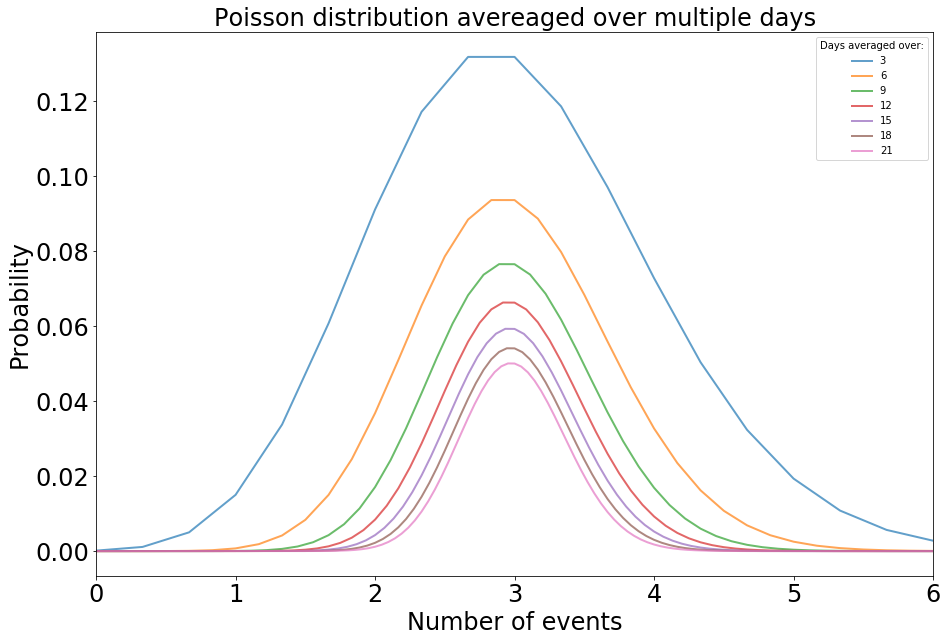

In [46]:
plt.rcParams["figure.figsize"] = (15,10)  
fig, ax = plt.subplots(1, 1)
average = 3
maxDays = 22
value = 20
x = np.linspace(0,10,11)
distribution = stats.poisson.pmf(x, average, loc=0)
ave = distribution

print("P value tells us how \"normal\" the distribution is, lower is more normal")

for day in range(1,maxDays):
    x = np.linspace(0,10,ave.size)
    if day % 3 == 0:
        ax.plot(x, ave, linewidth=2, alpha=0.7, label=day)
        a, b =stats.normaltest(ave)
        print("P value = ",b, "for ",day," days.")
    ave = np.convolve(distribution,ave)
    
plt.tick_params(labelsize = 24)
plt.legend(title="Days averaged over:")
plt.xlim([0,6])
plt.title("Poisson distribution avereaged over multiple days", fontsize=24)
plt.ylabel("Probability", fontsize=24)
plt.xlabel("Number of events", fontsize=24)
plt.show()

As we can see from the graph above, as we average over more and more days, we tend to approach a gaussian distribution.  The central limit theorem tells us that as we convolve a distribution with itself over, we will necesarilly approach a gaussian.  The difference between this and part **B)** is that in that part we are summing the distribution over multipe days.


**D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation.**

Probability:  0.9585336745270968
Sigma:  1.7339179022800981


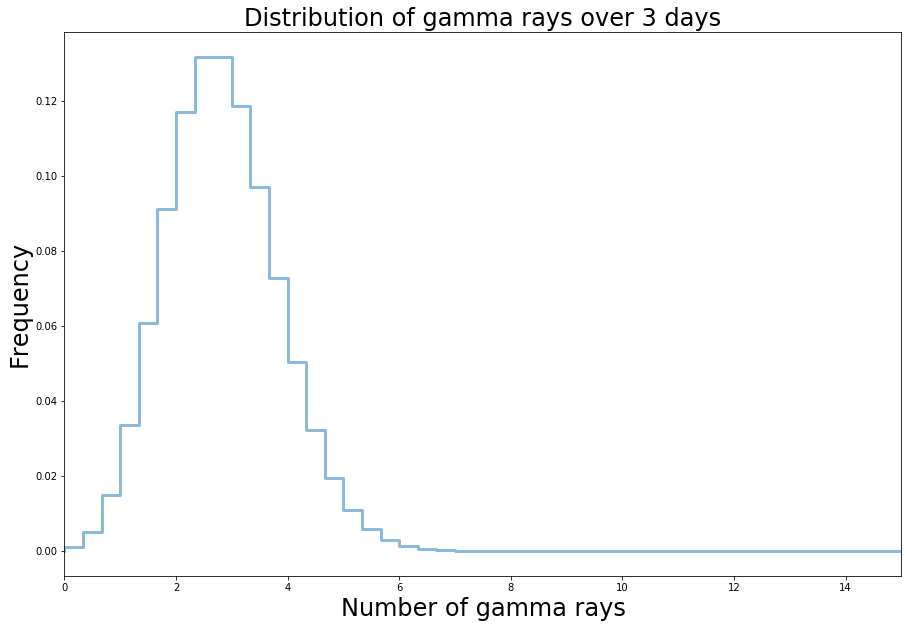

In [47]:
value = 5
plt.rcParams["figure.figsize"] = (15,10)  
fig, ax = plt.subplots(1, 1)
days = 3
rays = days*value
x = np.linspace(0,rays*2,rays*2+1)
plt.xlim([0,rays])
plt.title("Distribution of gamma rays over 3 days", fontsize=24)
plt.xlabel("Number of gamma rays", fontsize=24)
plt.ylabel("Frequency", fontsize=24)

distribution = stats.poisson.pmf(x, average, loc=0)
ave = distribution

for day in range(1,days):
    ave = np.convolve(distribution,ave)
    
ax.step(np.linspace(0, rays*2,ave.size), ave, linewidth=3, alpha=0.5)

prob = sum(ave[0:rays])
print("Probability: ",prob)
print("Sigma: ",stats.norm.ppf(prob))

# Problem 2
Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

**A) Show how the distribution changes as you average over more observing intervals.**

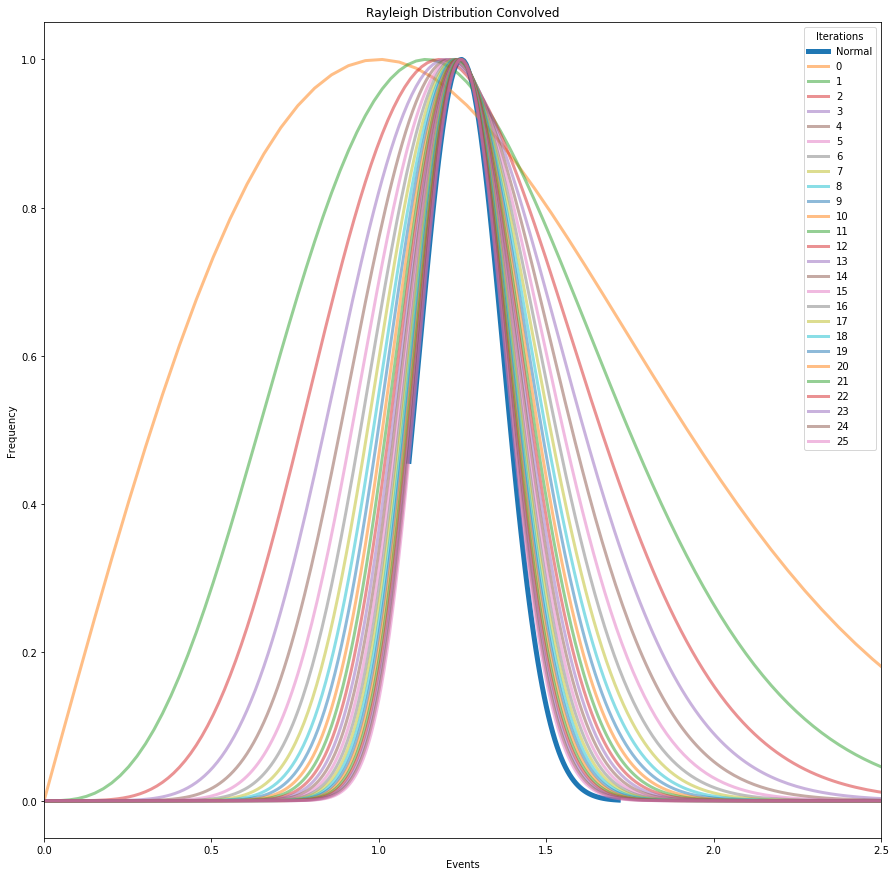

In [76]:
xMax = 5
iterations = 26
fig, ax = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = (15,15)  
x = np.linspace(0,xMax,100)
normX = np.linspace(0,5,100)
normY = stats.norm.pdf(normX, loc=1.25, scale=1)
init = stats.rayleigh.pdf(x, loc=0, scale=1)
dist = init
plt.xlim([0,2.5])
plt.title("Rayleigh Distribution Convolved")
plt.xlabel("Events")
plt.ylabel("Frequency")
ax.plot(normX/8+1.09, normY/np.amax(normY), linewidth = 5, alpha = 1, label="Normal")

for iter in range(iterations):
    x = np.linspace(0,xMax, dist.size)
    ax.plot(x, dist/np.amax(dist), linewidth=3, alpha=0.5, label=iter)
    ax.legend(title="Iterations")
    dist = np.convolve(dist, init)
    
plt.show()

**B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?**

After about 25 iterations, the Rayleigh distribution approaches the Gaussian.

## Problem 3

The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.

### Version 1
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

**A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?**

Gaussian width is defined as: $\Gamma = 2 \sqrt{2 \ln{2}} \sigma$

In [25]:
# if width is 50
std = 50 / (2 * (2 * math.log(2)) ** 0.5)
strength = 163.7123

prob = stats.norm.cdf(strength,loc=0,scale=std)
print("probability: ",1-prob)
sigma = stats.norm.ppf(prob)
print("sigma: ",sigma)

probability:  6.328271240363392e-15
sigma:  7.709243802498322


The resulting sigma is over 5, so detecting a signal strength of 163.7123 will result in 5 sigma certainty.

### Version 2
You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

**B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)**

Given a gaussian background distribution with a width of 50, what is the distribution over 10k samples?

**C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.**

  We can estimate the probability as 10k times the probability found above:

In [28]:
probNew = (1 - prob)*10000
print("Probability: ", probNew)
sigma = stats.norm.ppf(1-probNew)
print("Sigma: ",sigma)

Probability:  6.328271240363392e-11
Sigma:  6.431242050239435


The sigma is still over 5, so the signal is still significant

## Problem 4  
  
**A) Calculate the signal required for a 5-sigma detection in Version 1**

In [33]:
fiveSigmaProb = stats.norm.cdf(5, loc=0, scale=1)
fiveSigmaSignal = stats.norm.ppf(fiveSigmaProb, loc=0, scale=std)

print("Five sigma signal strength: ", fiveSigmaSignal)

Five sigma signal strength:  106.16522503536913


**B) Calculate the signal required for a 5-sigma detection in Version 2**  

Based on the assumption above, we need a probability 10k times better than A) in order to have 5 sigma detection

In [35]:
newFiveSigmaProb = (1 - (1 - fiveSigmaProb)/10000)
newFiveSigmaSignal = stats.norm.ppf(newFiveSigmaProb, loc=0, scale=std)

print("Five sigma signal strength: ", newFiveSigmaSignal)

Five sigma signal strength:  139.08785728052442


**C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.**


In [40]:
percentDiff = (newFiveSigmaSignal - fiveSigmaSignal) / fiveSigmaSignal
print("Percent increase: ",percentDiff*100)

Percent increase:  31.01074973861455


So the signal only needs to be about 30% brighter in order to have a 5 sigma certainty for 10k trials.  The relatively small difference can be accounted for due to how small the probibility for 5 sigma already is, being much greater than 99% already.  Even after getting 10,000 times closer to 100%, the actual value doesn't change that much.

**D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?**  
  
If we repeat **B)**, but with 1 million trials this time:

In [41]:
newFiveSigmaProb = (1 - (1 - fiveSigmaProb)/1000000)
newFiveSigmaSignal = stats.norm.ppf(newFiveSigmaProb, loc=0, scale=std)

print("Five sigma signal strength: ", newFiveSigmaSignal)

Five sigma signal strength:  153.01979126812546


So even after 1 million trials, the signal strength required to be significant hasn't changed all that much.